This post is my first note on AUtoencoders. I will show here implementation of simple undercoplete autoencoder in Tensorflow and show results using [the iris dataset](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)

I will present also tensorboard visualization of implemented autoencoder.

Type of Autoencoders [overview link](http://machinelearninguru.com/deep_learning/tensorflow/neural_networks/autoencoder/autoencoder.html):
 * Undercomplete autoencoders
 * Regularized:
     - Sparse autoencoders [link](https://web.stanford.edu/class/cs294a/sparseAutoencoder.pdf)
     - Denoising Autoencoders (DAE)
     - Contractive Autoencoders (CAE)
 * Variational Autoencoders 

Reference to Tensorflow [all symbols](https://www.tensorflow.org/api_docs/python/)

In [28]:
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from datetime import datetime   # As the code can be run many time, each time 
                                # a new log file for TensorBoard is created in a separate
                                # directory named with current date and time
from os.path import join        # use join function when creating paths
%matplotlib inline

In [3]:
print("Tensorflow version: ", tf.__version__)

Tensorflow version:  1.8.0


In [4]:
iris = datasets.load_iris()
print("iris dataset content: ",list(iris.keys()))
print("A shape of data content of iris dataset:", iris["data"].shape)

iris dataset content:  ['data', 'target', 'target_names', 'DESCR', 'feature_names']
A shape of data content of iris dataset: (150, 4)


* Total number of samples is 150
* The iris data consiste of 4 inputs (features): Sepal Length, Sepal Width, Petal Length and Petal Width
* More informatin of iris data set in [here](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)
* For Autoencoders only these inputs featres are required


In [5]:
print("Example of input sample: ",iris['data'][3,:])

Example of input sample:  [4.6 3.1 1.5 0.2]


In [24]:
X_train = iris['data']
type(X_train)

numpy.ndarray

Now, let's build the tensorflow code for simple autoencoder. As a help you can refer to that figure which was taken from [CS294A Lectuter Notes of Andrew Ng](https://web.stanford.edu/class/cs294a/sparseAutoencoder.pdf)

<img src="Autoencoder_basic_01.png">

To build the network of the architecture type shown above we can:
* use separate weigths and biases definition as it is [here](https://www.tensorflow.org/versions/r1.0/get_started/mnist/mechanics) end perform operation like: W*X+b
* use dense layer (fully connected layer) definition as it is [here](https://www.tensorflow.org/api_docs/python/tf/layers/dense)

In [14]:
n_input = 4
n_hidden = 2
n_output = n_input

In [20]:
tf.reset_default_graph()  # To avoid many duplicated nodes in the default grpah
sess = tf.Session()       # The graph is created when new session starts

In [21]:
X = tf.placeholder(tf.float32, shape=[None, n_input], name='Input')
L_hidden = tf.layers.dense(X, n_hidden, name='LayerHidden')
Output = tf.layers.dense(L_hidden, n_output, name='Output')

Znajdz strone www na ktorej byla mowa o prostym aoutoencoderze, ktory morze pelnic role PCA

Znlazełe. [Tutaj](https://github.com/ageron/handson-ml/blob/master/15_autoencoders.ipynb)

In [22]:
learning_rate = 0.01

AE_loss = tf.reduce_mean(tf.square(Output - X))
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(AE_loss)

init = tf.global_variables_initializer()

In [25]:
n_iterations = 1000
codings = L_hidden

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        training_op.run(feed_dict={X: X_train})
    codings_val = codings.eval(feed_dict={X: X_train})

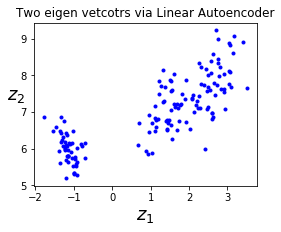

In [33]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings_val[:,0], codings_val[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
#save_fig("linear_autoencoder_pca_plot")
plt.title("Two eigen vetcotrs via Linear Autoencoder")
plt.show()
